In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
inpath='/content/gdrive/My Drive/Brain'
output_path='/content/gdrive/My Drive'

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
Fully1='/content/gdrive/My Drive/Brain/Volumesf1.npy'

Under1='/content/gdrive/My Drive/Brain/VolumesUnderf1.npy'

Fully2='/content/gdrive/My Drive/Brain/Volumesf2.npy'

Under2='/content/gdrive/My Drive/Brain/VolumesUnderf2.npy'

Fully3='/content/gdrive/My Drive/Brain/Volumesf3.npy'

Under3='/content/gdrive/My Drive/Brain/VolumesUnderf3.npy'

Fully4='/content/gdrive/My Drive/Brain/Volumesf4.npy'

Under4='/content/gdrive/My Drive/Brain/VolumesUnderf4.npy'

FullyS1=np.load(Fully1)
FullyS2=np.load(Fully2)
FullyS3=np.load(Fully3)
FullyS4=np.load(Fully4)
UnderS1=np.load(Under1)
UnderS2=np.load(Under2)
UnderS3=np.load(Under3)
UnderS4=np.load(Under4)

#UnderS3=np.load(Under3)
#Fully_Sampled= np.asarray(FullyS1)
#Undersampled= np.asarray(UnderS1)
Fully_Sampled=np.asarray( np.concatenate((FullyS1,FullyS1,FullyS1,FullyS1),axis=0))
Undersampled=np.asarray(np.concatenate((UnderS1,UnderS2,UnderS3,UnderS4),axis=0))

#from sklearn.model_selection import train_test_split
undersampled_train,undersampled_test,vol_val_train,vol_val_test = train_test_split(Undersampled,Fully_Sampled, test_size=0.2, random_state=0)
  
undersampled_train=undersampled_train.reshape(64,4,128,128,20)
undersampled_train=undersampled_train[:,:,:,:,0:1]
undersampled_train=undersampled_train.reshape(64,4,128,128)
vol_val_train=vol_val_train.reshape(64,4,128,128,20)
vol_val_train=vol_val_train[:,:,:,:,0:1]
vol_val_train=vol_val_train.reshape(64,4,128,128)
undersampled_test=undersampled_test.reshape(16,4,128,128,20)
undersampled_test=undersampled_test[:,:,:,:,0:1]
undersampled_test=undersampled_test.reshape(16,4,128,128)
vol_val_test=vol_val_test.reshape(16,4,128,128,20)
vol_val_test=vol_val_test[:,:,:,:,0:1]
vol_val_test=vol_val_test.reshape(16,4,128,128)










'\n\nimport torch\nimport torch.nn as nn\nimport torchvision.transforms as transforms\nimport torchvision.datasets as dsets\nfrom torch.autograd import Variable\n#from tensorboardX import SummaryWriter\n    \nimport torch.utils.data as utils\n\n\n\n\n\n\n#undersampled=VolumesUnder\nundersampled_train=torch.tensor(undersampled_train)\nprint(undersampled_train.size())\n\n#undersampled_train=undersampled_train[-1,0:256,0:15360]\nprint(undersampled_train.size()) \n\n\n#artifact_train = np.transpose(artifact_train, (0, 1, 3, 2))\n#artifact_train=artifact_train[0:6,0:256,0:15360,0:1]\n\nvol_val_train = torch.tensor(vol_val_train)\nprint(vol_val_train.size()) \n\n#artifact_train=artifact_train[-1,0:256,0:15360]\ntrainset=utils.TensorDataset(undersampled_train,vol_val_train)\n#train_dataset=utils.DataLoader(trainset)\nprint(undersampled_train.size())\n\n#TEST SET\nundersampled_test=torch.tensor(undersampled_test)\nvol_val_test = torch.tensor(vol_val_test)\ntestset=utils.TensorDataset(undersamp

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras import regularizers

input_img = Input(shape=(128, 128,4))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-9))(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-9))(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-9))(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-9))(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-9))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu',padding='same',activity_regularizer=regularizers.l1(10e-9))(x)
x = UpSampling2D((2, 2))(x)
x= Conv2D(16, (5, 5), activation='relu',padding='same',activity_regularizer=regularizers.l1(10e-9))(x)
decoded = Conv2D(4, (1, 1), activation='sigmoid', padding='valid',activity_regularizer=regularizers.l1(10e-9))(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

undersampled_train = np.reshape(undersampled_train, (len(undersampled_train), 128, 128,4))  # adapt this if using `channels_first` image data format
undersampled_test = np.reshape(undersampled_test, (len(undersampled_test), 128, 128,4))  # adapt this if using `channels_first` image data format
vol_val_train = np.reshape(vol_val_train, (len(vol_val_train), 128, 128,4))  # adapt this if using `channels_first` image data format
vol_val_test = np.reshape(vol_val_test, (len(vol_val_test), 128, 128,4))

In [ ]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 128, 128, 4)       0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 128, 128, 16)      592       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 64, 64, 8)         1160      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 32, 32, 8)         584       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 16, 16, 8)         0         
__________

In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(undersampled_train, vol_val_train,
                epochs=300,
                batch_size=1,
                shuffle=True,
                validation_data=(undersampled_test, vol_val_test))
#                callbacks=[TensorBoard(log_dir='/content/gdrive/My Drive/autoencoder')])

W0718 16:19:18.696291 140452017420160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 64 samples, validate on 16 samples
Epoch 1/300
64/64 [==============================] - 8s 129ms/step - loss: 0.1984 - val_loss: 0.0810
Epoch 2/300
64/64 [==============================] - 6s 92ms/step - loss: 0.0784 - val_loss: 0.0751
Epoch 3/300
64/64 [==============================] - 6s 93ms/step - loss: 0.0747 - val_loss: 0.0725
Epoch 4/300
64/64 [==============================] - 6s 93ms/step - loss: 0.0730 - val_loss: 0.0726
Epoch 5/300
64/64 [==============================] - 6s 94ms/step - loss: 0.0719 - val_loss: 0.0711
Epoch 6/300
64/64 [==============================] - 6s 94ms/step - loss: 0.0717 - val_loss: 0.0702
Epoch 7/300
64/64 [==============================] - 6s 94ms/step - loss: 0.0708 - val_loss: 0.0696
Epoch 8/300
64/64 [==============================] - 6s 95ms/step - loss: 0.0724 - val_loss: 0.0918
Epoch 9/300
64/64 [==============================] - 6s 96ms/step - loss: 0.0886 - val_loss: 0.0710
Epoch 10/300
64/64 [==============================] - 6

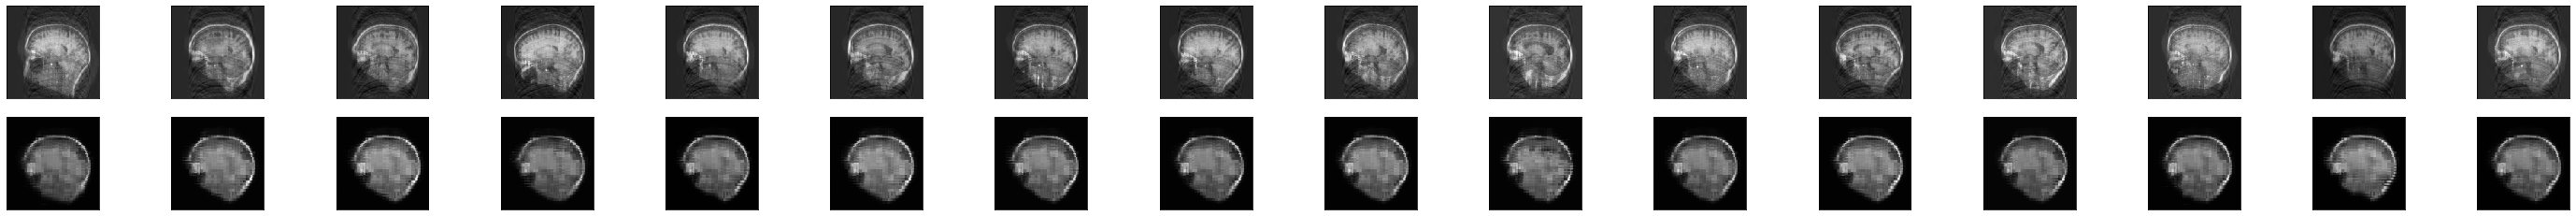

In [ ]:
import matplotlib.pyplot as plt
import pywt
decoded_imgs = autoencoder.predict(undersampled_test)

def idwav(imgs):
    imagepred=[]
    for imagef in imgs:
        imagef=imagef.reshape(4,128,128)
        c1,c2,c3,c4= np.array_split(imagef, 4,axis=0)
    
    #ca,cd=np.dsplit(imagef, 2)
        coeffs1=c1,(c2,c3,c4)
        imageff=pywt.idwt2(coeffs1, 'haar')
        #print(np.shape(imageff))
        imageff=imageff.reshape(256,256)
        imagepred.append(imageff)
    imagepred=np.asarray(imagepred,dtype=np.float64)
    return imagepred
  
undersampled_test_input=idwav(undersampled_test)
imagepred=idwav(decoded_imgs)



n = 16
plt.figure(figsize=(50, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(undersampled_test_input[i])##################printing test input
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i +n+1)
    plt.imshow(imagepred[i].reshape(256, 256))#######################printing prediction
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
original_images=idwav(vol_val_test)#######fully test images


from skimage.measure import compare_ssim as ssim

for im1,im2 in zip(original_images,imagepred):
    ssim_const = ssim(im1,im2)
                
    print(ssim_const)
      

0.8181268408996133
0.8610490510863994
0.8404102287090515
0.8063181648287164
0.8389518257677201
0.8144955731426932
0.8504790051161251
0.8109994488353257
0.8112851511330554
0.8271993622799806
0.8070414520164714
0.8624938810081434
0.8202009743142571
0.8490714350791634
0.8543200942101414
0.8459976673584155
